# Data Exploration


 Import necessary libraries



In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import tensorflow as tf

Download necessary NLTK data


In [61]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NTC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NTC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True



 Load the dataset




In [62]:
with open("C:/Users/NTC/Downloads/Sherlock Holmes Dataset.txt", 'r', encoding='utf-8') as file:

    text = file.read()


Display basic information


In [63]:
print(f"Total number of characters: {len(text)}")
print(f"Total number of words: {len(text.split())}")
print(f"Total number of sentences: {len(sent_tokenize(text))}")

Total number of characters: 610871
Total number of words: 104527
Total number of sentences: 6815



 Tokenize the text into words





In [64]:
words = word_tokenize(text.lower())



Remove punctuation and stopwords


In [65]:
stop_words = set(stopwords.words('english'))
words = [word for word in words if word.isalpha() and word not in stop_words]

Most common words


In [66]:
word_freq = Counter(words)
common_words = word_freq.most_common(20)

Plot the most common words


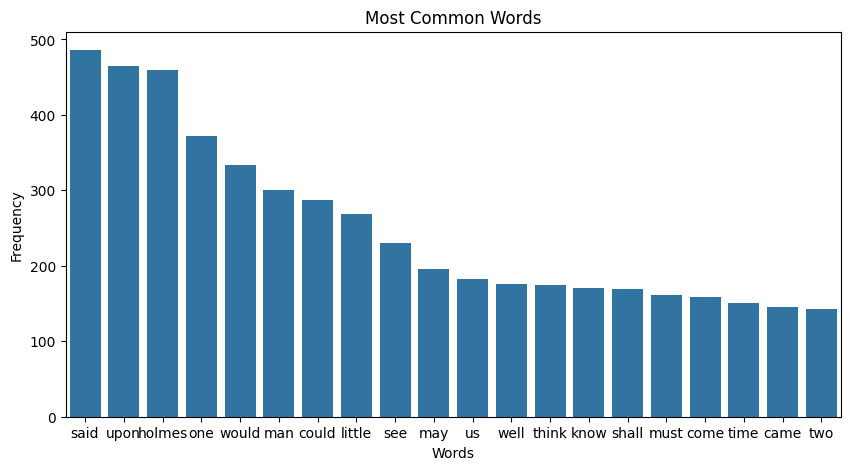

In [67]:
plt.figure(figsize=(10, 5))
sns.barplot(x=[word[0] for word in common_words], y=[word[1]
            for word in common_words])
plt.title('Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

#  Data Preprocessing

Clean and preprocess text data


In [68]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text


cleaned_text = clean_text(text)



Tokenize the text into words


In [69]:
tokenized_words = word_tokenize(cleaned_text)

 Build vocabulary and create word-to-index and index-to-word mappings



In [70]:
vocab = sorted(set(tokenized_words))
word_to_idx = {word: idx for idx, word in enumerate(vocab)}
idx_to_word = {idx: word for word, idx in word_to_idx.items()}

Convert words to indices


In [71]:
input_sequences = [word_to_idx[word] for word in tokenized_words]


 Prepare input and output pairs for model training


In [72]:
sequence_length = 100
X = []
y = []
for i in range(0, len(input_sequences) - sequence_length):
    X.append(input_sequences[i:i + sequence_length])
    y.append(input_sequences[i + sequence_length])


Convert to numpy arrays

In [73]:

X = np.array(X)
y = np.array(y)






 One-hot encode the output labels


In [74]:
y = tf.keras.utils.to_categorical(y, num_classes=len(vocab))

#  Model Architecture

RNN Model

In [75]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

 Define the RNN model


In [76]:
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=len(vocab),
              output_dim=100, input_length=sequence_length))
rnn_model.add(SimpleRNN(units=128, return_sequences=True))
rnn_model.add(SimpleRNN(units=128))
rnn_model.add(Dense(units=len(vocab), activation='softmax'))

c:\Users\NTC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Compile the model

In [77]:
rnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy', metrics=['accuracy'])



 Display the model summary

In [78]:

rnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

LSTM Model

In [79]:
from tensorflow.keras.layers import LSTM



 Define the LSTM model


In [80]:
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(vocab),
               output_dim=100, input_length=sequence_length))
lstm_model.add(LSTM(units=128, return_sequences=True))
lstm_model.add(LSTM(units=128))
lstm_model.add(Dense(units=len(vocab), activation='softmax'))

 Compile the model

In [81]:


lstm_model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Display the model summary

In [82]:

lstm_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [83]:
# Define training parameters
batch_size = 128
epochs = 20

# Train the RNN model
rnn_history = rnn_model.fit(
    X, y, batch_size=batch_size, epochs=epochs, validation_split=0.2)

# Train the LSTM model
lstm_history = lstm_model.fit(
    X, y, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/20
653/653 ━━━━━━━━━━━━━━━━━━━━ 119s 172ms/step - accuracy: 0.0534 - loss: 6.8835 - val_accuracy: 0.0601 - val_loss: 6.2932
Epoch 2/20
653/653 ━━━━━━━━━━━━━━━━━━━━ 116s 178ms/step - accuracy: 0.0695 - loss: 6.0971 - val_accuracy: 0.0730 - val_loss: 6.1805
Epoch 3/20
653/653 ━━━━━━━━━━━━━━━━━━━━ 108s 165ms/step - accuracy: 0.0858 - loss: 5.8102 - val_accuracy: 0.0930 - val_loss: 6.0381
Epoch 4/20
653/653 ━━━━━━━━━━━━━━━━━━━━ 100s 153ms/step - accuracy: 0.1020 - loss: 5.5606 - val_accuracy: 0.1021 - val_loss: 5.9986
Epoch 5/20
653/653 ━━━━━━━━━━━━━━━━━━━━ 96s 147ms/step - accuracy: 0.1165 - loss: 5.3323 - val_accuracy: 0.1099 - val_loss: 5.9655
Epoch 6/20
653/653 ━━━━━━━━━━━━━━━━━━━━ 107s 164ms/step - accuracy: 0.1287 - loss: 5.1458 - val_accuracy: 0.1141 - val_loss: 5.9665
Epoch 7/20
653/653 ━━━━━━━━━━━━━━━━━━━━ 117s 178ms/step - accuracy: 0.1324 - loss: 5.0818 - val_accuracy: 0.1138 - val_loss: 5.9829
Epoch 8/20
653/653 ━━━━━━━━━━━━━━━━━━━━ 115s 176ms/step - accuracy: 0.1362 - 

# Evaluation

3262/3262 ━━━━━━━━━━━━━━━━━━━━ 78s 24ms/step - accuracy: 0.2779 - loss: 3.5559
RNN Model - Loss: 4.095613479614258, Accuracy: 0.24496325850486755
3262/3262 ━━━━━━━━━━━━━━━━━━━━ 261s 80ms/step - accuracy: 0.2041 - loss: 4.1369
LSTM Model - Loss: 4.594848155975342, Accuracy: 0.18933159112930298


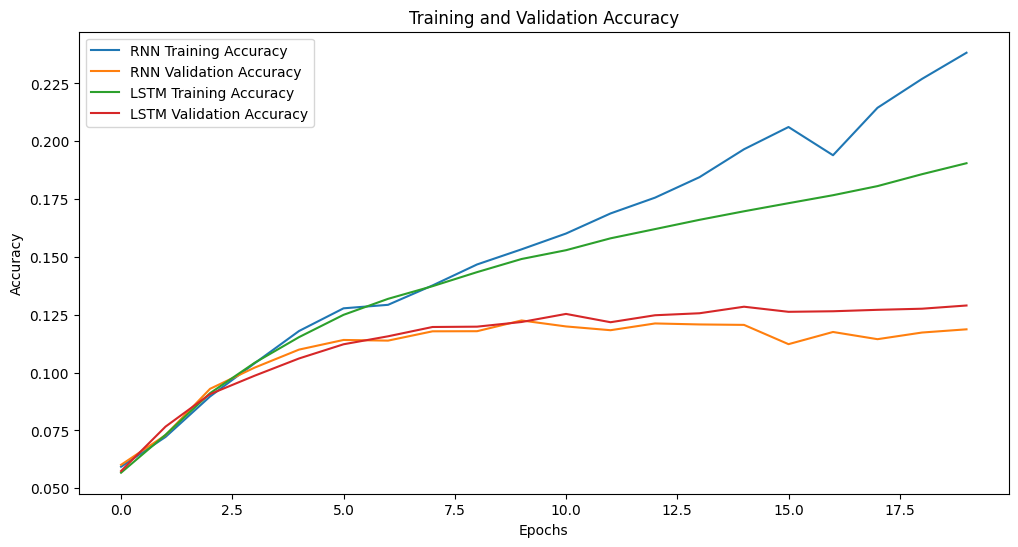

In [84]:
# Evaluate the RNN model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X, y)
print(f"RNN Model - Loss: {rnn_loss}, Accuracy: {rnn_accuracy}")

# Evaluate the LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X, y)
print(f"LSTM Model - Loss: {lstm_loss}, Accuracy: {lstm_accuracy}")

# Plot training history for both models
plt.figure(figsize=(12, 6))
plt.plot(rnn_history.history['accuracy'], label='RNN Training Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='RNN Validation Accuracy')
plt.plot(lstm_history.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'],
         label='LSTM Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#  Creativity and Language Analysis

Text Generation

In [85]:
def generate_text(model, seed_text, next_words, max_sequence_len):
    for _ in range(next_words):
        token_list = [word_to_idx[word]
                      for word in word_tokenize(seed_text) if word in word_to_idx]
        token_list = np.pad(token_list, (max_sequence_len -
                            len(token_list), 0), 'constant')
        predicted = model.predict(token_list.reshape(1, -1), verbose=0)
        predicted_word = idx_to_word[np.argmax(predicted)]
        seed_text += " " + predicted_word
    return seed_text


# Generate text using the RNN model
seed_text = "Sherlock Holmes"
generated_text_rnn = generate_text(rnn_model, seed_text, 50, sequence_length)
print(f"Generated Text (RNN): {generated_text_rnn}")

# Generate text using the LSTM model
generated_text_lstm = generate_text(lstm_model, seed_text, 50, sequence_length)
print(f"Generated Text (LSTM): {generated_text_lstm}")

Generated Text (RNN): Sherlock Holmes series of events and the rockies which have been submitted to me to the proper authorities that the lady had been cut in the room and i am afraid that i am afraid that i am afraid that i am afraid that i am afraid that i am afraid that
Generated Text (LSTM): Sherlock Holmes pool of the door of the door of the window and the man was a man who had been in the same and the man was a man who had been in the same and the man was a man who had been in the same and the man was


Linguistic Analysis

In [86]:
# Perform linguistic analysis on the generated text
def linguistic_analysis(text):
    sentences = sent_tokenize(text)
    words = word_tokenize(text)
    avg_sentence_length = sum(len(word_tokenize(sentence))
                              for sentence in sentences) / len(sentences)
    avg_word_length = sum(len(word) for word in words) / len(words)

    print(f"Average Sentence Length: {avg_sentence_length}")
    print(f"Average Word Length: {avg_word_length}")


print("Linguistic Analysis (RNN Generated Text):")
linguistic_analysis(generated_text_rnn)

print("Linguistic Analysis (LSTM Generated Text):")
linguistic_analysis(generated_text_lstm)

Linguistic Analysis (RNN Generated Text):
Average Sentence Length: 52.0
Average Word Length: 3.8461538461538463
Linguistic Analysis (LSTM Generated Text):
Average Sentence Length: 52.0
Average Word Length: 3.1538461538461537
